In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import tree

## Display Training & Test data (top & bottom five datasets)

In [3]:
#load the csv file
train_data = pd.read_csv('train_data_preprocessed_v3.csv')
test_data = pd.read_csv('test_data_preprocessed_v3.csv')

In [4]:
train_data.shape

(63874, 55)

In [5]:
test_data.shape

(9043, 55)

In [6]:
train_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,29,42,0,0,1,0,1,0,0,0,...,0,-0.710220,0.556372,-1.832544,5.809419,-0.531878,0.087504,1.789912,-1.279360,1
1,15,50,0,0,1,0,1,0,0,0,...,0,-0.605846,0.556372,0.243524,-0.011872,-0.531878,0.840223,-0.015243,-0.665628,1
2,5,47,0,0,1,0,1,0,0,0,...,0,-0.440095,0.556372,-1.201884,3.516911,-0.531878,0.574884,-1.294733,-1.277750,1
3,16,39,0,1,0,0,1,0,0,0,...,0,-0.154512,0.556372,-1.240974,-0.724921,-0.531878,-0.177147,0.095431,-0.473078,1
4,30,30,1,0,0,0,1,0,1,0,...,0,-0.463407,0.556372,-0.033302,-0.011872,-0.531878,-1.022643,1.883206,-0.257505,0


In [7]:
test_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,14,48,0,0,1,0,1,0,0,0,...,0,-0.353943,0.46161,0.033731,-0.811596,-0.435061,0.669934,-0.213638,-0.403107,1
1,22,31,0,1,0,0,1,0,0,1,...,0,3.367438,0.46161,-0.425208,-0.170094,-0.435061,-0.939981,0.705061,-0.159961,1
2,9,45,0,0,1,0,1,0,0,0,...,0,-0.112356,0.46161,-0.002151,-0.811596,-0.435061,0.399123,-0.819273,-0.508545,1
3,20,58,0,0,0,1,1,0,0,0,...,0,0.064959,0.46161,-1.512344,0.322148,-0.435061,1.600722,0.529756,-0.483361,1
4,21,35,0,1,0,0,1,0,0,0,...,0,1.839344,0.46161,2.413680,-0.170094,-0.435061,-0.565282,0.593416,-0.191371,0


In [8]:
# Creating X,Y test and train data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

### Creating individual base classifiers

In [21]:
random_forest = RandomForestClassifier(n_estimators=25, random_state=1)
naive_bayes = GaussianNB()
LR = LogisticRegression(C = 0.1, max_iter = 200, penalty = 'l1', solver = 'liblinear')
NN = MLPClassifier(max_iter=1000, random_state=42)

## 1. Ensemble Method - Gradient Boosting for Classification
#### Gradient Boosting is a powerful ensemble machine learning technique used for both classification and regression tasks. It is a sequential, additive modeling technique that builds an ensemble of weak learners (usually decision trees) to create a strong predictive model. Gradient Boosting is known for its high predictive accuracy and flexibility.

### Hyperparameter Tunning for GradientBoostingClassifier

In [48]:
model = GradientBoostingClassifier(random_state=42)
# Define a smaller search space for hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01],
    'max_depth': [4,5,6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Use RandomizedSearchCV to search through a subset of the hyperparameter space
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10,
                                   scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search to your data
random_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy:.2f}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

Best Model Accuracy: 0.77
Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 6, 'learning_rate': 0.01}


### Training Performance

In [12]:
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 4, max_depth = 6, learning_rate = 0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [49]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(best_model, x_train, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.69 0.89 0.95 0.95 0.95 0.95 0.95 0.94 0.95 0.95]
Ten-fold Cross Validation Score= 0.9178


### Testing Performance

Testing Accuracy: 0.7622470419108703
Confusion Matrix:
 [[ 915  143]
 [2007 5978]]
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.86      0.46      1058
           1       0.98      0.75      0.85      7985

    accuracy                           0.76      9043
   macro avg       0.64      0.81      0.65      9043
weighted avg       0.90      0.76      0.80      9043



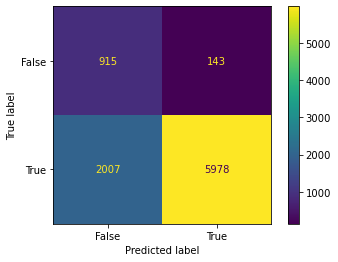

In [13]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Feature Importance Assessment
#### Assessing feature importance in a Gradient Boosting Classifier is a valuable step to understand which features have the most impact on model predictions

In [15]:
feature_importance = model.feature_importances_

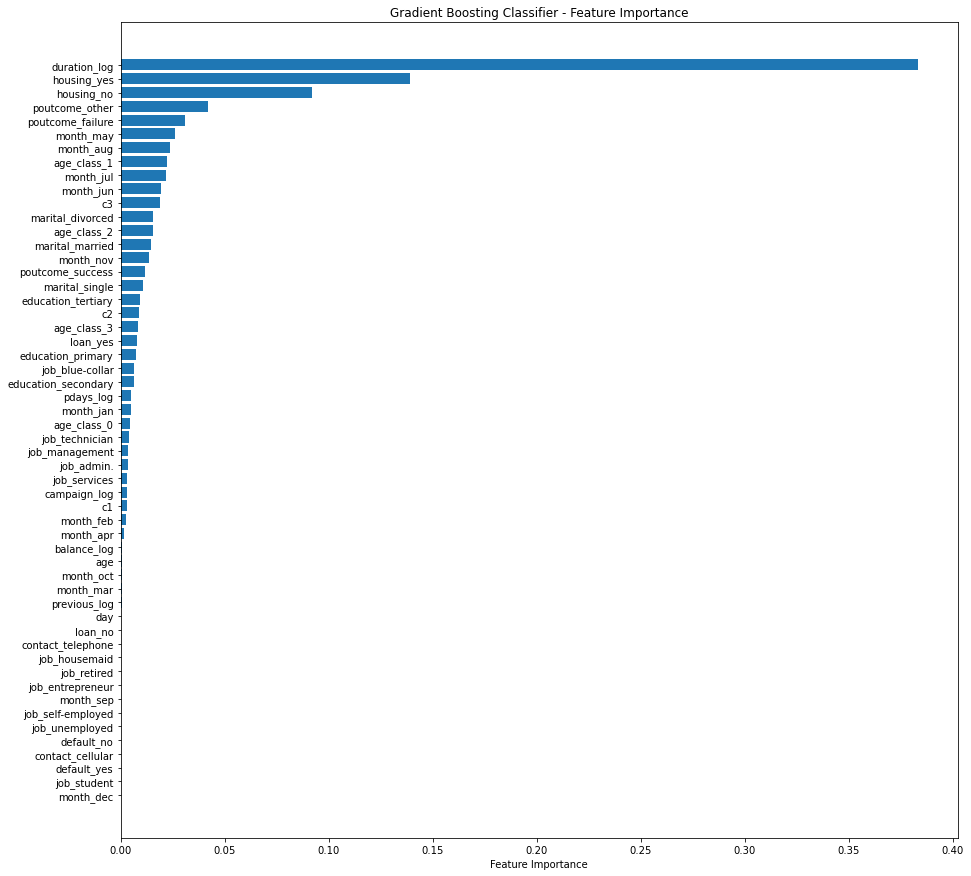

array([10, 35,  7, 41,  6, 37, 33, 19, 29, 32, 30, 42, 20,  0, 50, 15, 18,
        1, 46,  8, 11, 51, 49, 34, 27, 31, 36,  2, 12, 47, 39, 28, 38, 21,
        5, 52, 40, 26, 45, 17, 25,  4, 24, 53, 14, 13,  3,  9, 16, 43, 44,
       22, 23, 48], dtype=int64)

In [16]:
## Visualizaing Feature importance
feature_names = x_train.columns
sorted_idx = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Create a bar plot
plt.figure(figsize=(15, 15))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align="center")
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Classifier - Feature Importance")
plt.show()
sorted_idx

### Next we try to drop few features that are analysed to be the least important one to see how the performance is affected.

In [17]:
x_test_FIA = x_test
x_test_FIA.drop(x_test_FIA.columns[[7, 10, 41, 35,  6]],axis=1)

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,month_apr,month_aug,month_feb,month_jan,...,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3
0,14,48,0,0,1,0,0,0,0,0,...,0,0,-0.353943,0.461610,0.033731,-0.811596,-0.435061,0.669934,-0.213638,-0.403107
1,22,31,0,1,0,0,0,1,0,0,...,0,0,3.367438,0.461610,-0.425208,-0.170094,-0.435061,-0.939981,0.705061,-0.159961
2,9,45,0,0,1,0,0,0,0,0,...,0,0,-0.112356,0.461610,-0.002151,-0.811596,-0.435061,0.399123,-0.819273,-0.508545
3,20,58,0,0,0,1,0,0,0,0,...,0,0,0.064959,0.461610,-1.512344,0.322148,-0.435061,1.600722,0.529756,-0.483361
4,21,35,0,1,0,0,0,0,0,0,...,0,0,1.839344,0.461610,2.413680,-0.170094,-0.435061,-0.565282,0.593416,-0.191371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,2,27,1,0,0,0,0,0,0,0,...,0,0,-0.629341,0.461610,-0.283707,0.322148,-0.435061,-1.284567,-1.695322,-0.726517
9039,14,34,0,1,0,0,0,0,0,0,...,0,0,-0.524900,-1.259717,-1.136982,-0.170094,1.584341,-0.647859,-0.249135,1.347400
9040,2,34,0,1,0,0,0,0,1,0,...,0,0,0.391482,0.461610,-0.113487,-0.811596,-0.435061,-0.623356,-1.681967,-0.518769
9041,19,37,0,1,0,0,0,0,0,0,...,0,0,-0.593074,0.461610,-0.168644,2.020132,-0.435061,-0.378125,0.364680,-0.608740


In [18]:
x_train_FIA = x_train
x_train_FIA.drop(x_train_FIA.columns[[7, 10, 41, 35,  6]],axis=1)

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,month_apr,month_aug,month_feb,month_jan,...,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3
0,29,42,0,0,1,0,0,0,0,0,...,1,0,-0.710220,0.556372,-1.832544,5.809419,-0.531878,0.087504,1.789912,-1.279360
1,15,50,0,0,1,0,0,0,0,0,...,1,0,-0.605846,0.556372,0.243524,-0.011872,-0.531878,0.840223,-0.015243,-0.665628
2,5,47,0,0,1,0,0,0,0,0,...,1,0,-0.440095,0.556372,-1.201884,3.516911,-0.531878,0.574884,-1.294733,-1.277750
3,16,39,0,1,0,0,0,0,0,0,...,1,0,-0.154512,0.556372,-1.240974,-0.724921,-0.531878,-0.177147,0.095431,-0.473078
4,30,30,1,0,0,0,1,0,0,0,...,1,0,-0.463407,0.556372,-0.033302,-0.011872,-0.531878,-1.022643,1.883206,-0.257505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,22,52,0,0,0,0,0,0,0,0,...,1,0,-0.080952,0.556372,0.386020,0.535269,-0.531878,1.017719,0.888238,-0.544926
63870,10,43,0,0,0,0,0,0,0,0,...,1,0,-0.551215,0.556372,0.878962,-0.724921,-0.531878,0.198706,-0.670150,-0.560707
63871,9,46,0,0,1,0,0,0,0,0,...,1,0,0.736725,0.556372,0.622432,-0.724921,-0.531878,0.479270,-0.794217,-0.477863
63872,8,43,0,0,0,0,0,0,0,0,...,1,0,-0.611457,0.556372,1.670648,-0.724921,-0.531878,0.199475,-0.928037,-0.647951


In [19]:
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 4,
                                   min_samples_leaf = 2, max_depth = 6, learning_rate = 0.01)
model.fit(x_train_FIA, y_train)
y_pred = model.predict(x_test_FIA)

In [20]:
## Model performance
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(model, x_train_FIA, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.69 0.89 0.95 0.95 0.95 0.95 0.95 0.94 0.95 0.95]
Ten-fold Cross Validation Score= 0.9179


Accuracy: 0.7727524051752737
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.86      0.47      1058
           1       0.98      0.76      0.86      7985

    accuracy                           0.77      9043
   macro avg       0.65      0.81      0.66      9043
weighted avg       0.90      0.77      0.81      9043



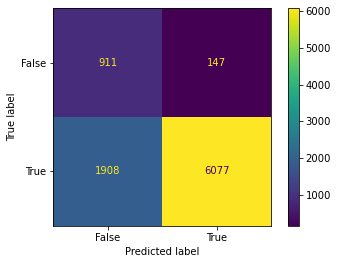

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_rep)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Next we try to drop few features that are analysed to be the most important one to see how the performance is affected.

In [22]:
x_test_FIA = x_test
x_test_FIA.drop(x_test_FIA.columns[[43, 44, 22, 23, 48]],axis=1)

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,contact_cellular,contact_telephone,poutcome_success,balance_log,pdays_log,campaign_log,previous_log,c1,c2,c3
0,14,48,0,0,1,0,1,0,0,0,...,1,0,0,-0.353943,0.461610,-0.811596,-0.435061,0.669934,-0.213638,-0.403107
1,22,31,0,1,0,0,1,0,0,1,...,1,0,0,3.367438,0.461610,-0.170094,-0.435061,-0.939981,0.705061,-0.159961
2,9,45,0,0,1,0,1,0,0,0,...,1,0,0,-0.112356,0.461610,-0.811596,-0.435061,0.399123,-0.819273,-0.508545
3,20,58,0,0,0,1,1,0,0,0,...,1,0,0,0.064959,0.461610,0.322148,-0.435061,1.600722,0.529756,-0.483361
4,21,35,0,1,0,0,1,0,0,0,...,1,0,0,1.839344,0.461610,-0.170094,-0.435061,-0.565282,0.593416,-0.191371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,2,27,1,0,0,0,1,0,0,0,...,1,0,0,-0.629341,0.461610,0.322148,-0.435061,-1.284567,-1.695322,-0.726517
9039,14,34,0,1,0,0,1,0,0,0,...,1,0,0,-0.524900,-1.259717,-0.170094,1.584341,-0.647859,-0.249135,1.347400
9040,2,34,0,1,0,0,1,0,0,0,...,1,0,0,0.391482,0.461610,-0.811596,-0.435061,-0.623356,-1.681967,-0.518769
9041,19,37,0,1,0,0,1,0,0,0,...,1,0,0,-0.593074,0.461610,2.020132,-0.435061,-0.378125,0.364680,-0.608740


In [23]:
x_train_FIA = x_train
x_train_FIA.drop(x_train_FIA.columns[[43, 44, 22, 23, 48]],axis=1)

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,contact_cellular,contact_telephone,poutcome_success,balance_log,pdays_log,campaign_log,previous_log,c1,c2,c3
0,29,42,0,0,1,0,1,0,0,0,...,1,0,0,-0.710220,0.556372,5.809419,-0.531878,0.087504,1.789912,-1.279360
1,15,50,0,0,1,0,1,0,0,0,...,1,0,0,-0.605846,0.556372,-0.011872,-0.531878,0.840223,-0.015243,-0.665628
2,5,47,0,0,1,0,1,0,0,0,...,1,0,0,-0.440095,0.556372,3.516911,-0.531878,0.574884,-1.294733,-1.277750
3,16,39,0,1,0,0,1,0,0,0,...,1,0,0,-0.154512,0.556372,-0.724921,-0.531878,-0.177147,0.095431,-0.473078
4,30,30,1,0,0,0,1,0,1,0,...,1,0,0,-0.463407,0.556372,-0.011872,-0.531878,-1.022643,1.883206,-0.257505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63869,22,52,0,0,0,0,1,0,0,0,...,1,0,0,-0.080952,0.556372,0.535269,-0.531878,1.017719,0.888238,-0.544926
63870,10,43,0,0,0,0,1,0,0,0,...,1,0,0,-0.551215,0.556372,-0.724921,-0.531878,0.198706,-0.670150,-0.560707
63871,9,46,0,0,1,0,1,0,0,0,...,1,0,0,0.736725,0.556372,-0.724921,-0.531878,0.479270,-0.794217,-0.477863
63872,8,43,0,0,0,0,1,0,0,0,...,1,0,0,-0.611457,0.556372,-0.724921,-0.531878,0.199475,-0.928037,-0.647951


In [24]:
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 4,
                                   min_samples_leaf = 2, max_depth = 6, learning_rate = 0.01)
model.fit(x_train_FIA, y_train)
y_pred = model.predict(x_test_FIA)

In [25]:
## Model performance
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(model, x_train_FIA, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.69 0.89 0.95 0.95 0.95 0.95 0.95 0.94 0.95 0.95]
Ten-fold Cross Validation Score= 0.9179


Accuracy: 0.7671126838438571
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.86      0.46      1058
           1       0.98      0.75      0.85      7985

    accuracy                           0.77      9043
   macro avg       0.65      0.81      0.66      9043
weighted avg       0.90      0.77      0.81      9043



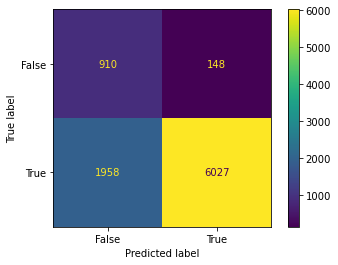

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_rep)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## 2. Ensemble Method - AdaBoost
### AdaBoost (Adaptive Boosting) is an ensemble learning technique that combines multiple weak classifiers to create a strong classifier. 

### Model Performance

Training accuracy: 0.882 (+/- 0.0045) Testing accuracy: 0.709 [Decision Tree]
Confusion Matrix:
 [[ 727  331]
 [2296 5689]]
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.69      0.36      1058
           1       0.95      0.71      0.81      7985

    accuracy                           0.71      9043
   macro avg       0.59      0.70      0.58      9043
weighted avg       0.86      0.71      0.76      9043



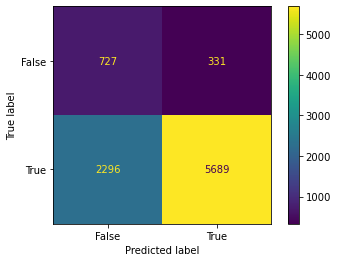

Training accuracy: 0.897 (+/- 0.0043) Testing accuracy: 0.861 [random_forest]
Confusion Matrix:
 [[ 768  290]
 [ 964 7021]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.73      0.55      1058
           1       0.96      0.88      0.92      7985

    accuracy                           0.86      9043
   macro avg       0.70      0.80      0.73      9043
weighted avg       0.90      0.86      0.88      9043



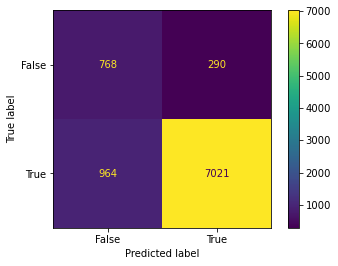

Training accuracy: 0.603 (+/- 0.1986) Testing accuracy: 0.859 [Naive_Bayes]
Confusion Matrix:
 [[  48 1010]
 [ 268 7717]]
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.05      0.07      1058
           1       0.88      0.97      0.92      7985

    accuracy                           0.86      9043
   macro avg       0.52      0.51      0.50      9043
weighted avg       0.80      0.86      0.82      9043



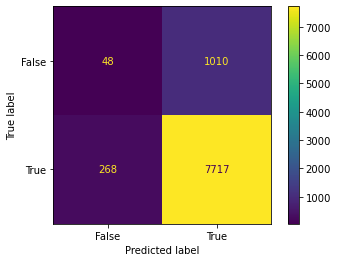

In [20]:
for clf, label in zip([DT, random_forest, naive_bayes], ['Decision Tree','random_forest', 'Naive_Bayes']):
    adaboost_classifier = AdaBoostClassifier(clf,algorithm='SAMME.R')
    adaboost_classifier.fit(x_train, y_train)
    y_pred = adaboost_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores = cross_val_score(adaboost_classifier, x_test, y_test,error_score='raise', scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) Testing accuracy: %0.3f [%s]" % (scores.mean(), scores.std(),accuracy, label))
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print("Confusion Matrix:\n", confusion_matrix)
    print("Classification Report:\n", classification_rep)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

### Feature Importance Assessment
#### Similar result obtained for random forest assessment since logistic regression and naive bayes are not applicable for feature importance assessment

## 3. Ensemble Method - Hard voting classifier

### Model Performance - Combination 1

In [22]:
# Soft voting classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('Neural_Network', NN),
    ('logistic_regression', LR),
    ('naive_bayes',naive_bayes )
], voting='hard')

In [23]:
ensemble_classifier = ensemble_classifier.fit(x_train, y_train)

In [ ]:
for clf, label in zip([NN, LR, naive_bayes, ensemble_classifier], 
                      ['Neural_Network', 'logistic_regression', 'naive_bayes', 'ensemble_classifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(),label))
y_pred = ensemble_classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing accuracy: %0.3f [Ensemble Classifier]'% accuracy)

Training accuracy: 0.923 (+/- 0.1246) [Neural_Network]
Training accuracy: 0.931 (+/- 0.1244) [logistic_regression]
Training accuracy: 0.894 (+/- 0.1128) [naive_bayes]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])
cm_display.plot()
plt.show()

### Model Performance - Combination 2

In [20]:
# Soft voting classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('Logistic_Regression', LR),
    ('naive_bayes',naive_bayes )
], voting='hard')
ensemble_classifier = ensemble_classifier.fit(x_train, y_train)

In [21]:
for clf, label in zip([random_forest, LR, naive_bayes, ensemble_classifier], 
                      ['random_forest', 'Logistic Regression', 'naive_bayes', 'ensemble_classifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(),label))
y_pred = ensemble_classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing accuracy: %0.3f [Ensemble Classifier]'% accuracy)

Training accuracy: 0.934 (+/- 0.1091) [random_forest]
Training accuracy: 0.931 (+/- 0.1244) [Logistic Regression]
Training accuracy: 0.894 (+/- 0.1128) [naive_bayes]
Training accuracy: 0.933 (+/- 0.1230) [ensemble_classifier]
Testing accuracy: 0.896 [Ensemble Classifier]


Testing Accuracy: 0.8959416122968041
Confusion Matrix:
 [[ 520  538]
 [ 403 7582]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.49      0.52      1058
           1       0.93      0.95      0.94      7985

    accuracy                           0.90      9043
   macro avg       0.75      0.72      0.73      9043
weighted avg       0.89      0.90      0.89      9043



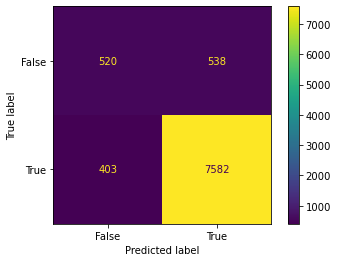

In [22]:
accuracy = accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])
cm_display.plot()
plt.show()

### Feature Importance Assessment
#### Similar result obtained for random forest assessment since logistic regression and naive bayes are not applicable for feature importance assessment